In [153]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv("data_copy.csv")

In [155]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [156]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [157]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [158]:
def normalize(data_frame):
    for col in data_frame.columns:
        if col == 'class':
            continue
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(float)
            data_frame[col] /= data_frame[col].max()
    data_frame.describe()
    print("NORMALIZED SUCCESSFULLY!!!")

In [159]:
normalize(df)

NORMALIZED SUCCESSFULLY!!!


In [160]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,0.368960,0.275464,0.286300,0.282360,0.720232,-0.010143,Normal
306,0.415428,0.419193,0.232384,0.273535,0.701325,-0.001006,Normal
307,0.473270,0.459116,0.367182,0.319128,0.770650,-0.006470,Normal
308,0.348543,0.175861,0.330701,0.301077,0.726958,0.000513,Normal
309,0.260653,0.102646,0.291399,0.236908,0.760069,-0.000476,Normal


In [161]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.465954,0.354889,0.412995,0.353735,0.723124,0.062829
std,0.132758,0.202467,0.147556,0.110542,0.081666,0.089738
min,0.201395,-0.132606,0.111339,0.110080,0.429767,-0.026421
25%,0.357613,0.215793,0.294252,0.274621,0.678902,0.003832
50%,0.452047,0.330914,0.394158,0.349214,0.725256,0.028116
75%,0.561314,0.447493,0.501024,0.433963,0.769405,0.098645
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
df.sample(frac=1)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
234,0.290617,0.189884,0.334016,0.233433,0.832404,0.032692,Normal
20,0.338300,0.286818,0.300873,0.244956,0.824555,0.015415,Abnormal
219,0.495339,0.532619,0.405265,0.312803,0.651113,0.007450,Normal
301,0.685605,0.527514,0.548910,0.518316,0.683635,0.014482,Normal
249,0.390909,0.409353,0.294252,0.251325,0.750247,0.005468,Normal
...,...,...,...,...,...,...,...
196,0.491184,0.258202,0.519797,0.420071,0.550820,0.133787,Abnormal
251,0.313839,0.037132,0.397638,0.320445,0.853905,0.001597,Normal
48,0.312378,0.363688,0.270394,0.185948,0.742291,-0.003673,Abnormal
51,0.573298,0.840699,0.220292,0.270743,0.661977,0.011946,Abnormal


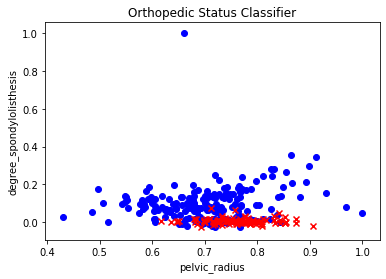

In [175]:
# plotting data
plt.title("Orthopedic Status Classifier")
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
for n, i in enumerate(df['class']):
    if i == 1:
        plt.scatter(df['pelvic_radius'][n], df['degree_spondylolisthesis'][n], color='b', marker='o')
    elif i == 0:
        plt.scatter(df['pelvic_radius'][n], df['degree_spondylolisthesis'][n], color='r', marker='x')
plt.show()

In [ ]:
# plotting data
plt.title("Orthopedic Status Classifier")
plt.xlabel("pelvic_incidence")
plt.ylabel("pelvic_tilt numeric")
for n, i in enumerate(df['class']):
    if i == 'Abnormal':
        plt.scatter(df['pelvic_incidence'][n], df['pelvic_tilt numeric'][n], color='b', marker='o')
    elif i == 'Normal':
        plt.scatter(df['pelvic_incidence'][n], df['pelvic_tilt numeric'][n], color='r', marker='x')
plt.show()

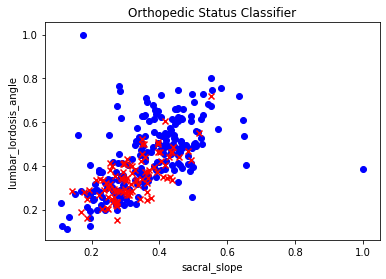

In [173]:
# plotting data
plt.title("Orthopedic Status Classifier")
plt.xlabel("sacral_slope")
plt.ylabel("lumbar_lordosis_angle")
for n, i in enumerate(df['class']):
    if i == 1:
        plt.scatter(df['sacral_slope'][n], df['lumbar_lordosis_angle'][n], color='b', marker='o')
    elif i == 0:
        plt.scatter(df['sacral_slope'][n], df['lumbar_lordosis_angle'][n], color='r', marker='x')
plt.show()

In [176]:
# from data visualization a simple model based on logistic regression isn't the optimum solution

In [164]:
#normal = 0 abnormal = 1
for n,i in enumerate(df['class']):
    if i == 'Normal':
        df['class'][n] = 0
    else:
        df['class'][n] = 1

/home/magneto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/magneto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [165]:
df.sample(frac=1)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
79,0.367736,0.244566,0.310158,0.293630,0.720618,0.051804,1
71,0.669322,0.666132,0.380097,0.444477,0.828322,0.243031,1
137,0.642332,0.694107,0.623682,0.404231,0.677413,0.118679,1
97,0.575510,0.399680,0.657975,0.452639,0.670607,0.079576,1
5,0.310013,0.281638,0.199813,0.216819,0.799209,0.005330,1
...,...,...,...,...,...,...,...
300,0.390319,0.130715,0.278347,0.364122,0.714952,-0.000513,0
92,0.657396,0.320540,0.569964,0.572409,0.762979,0.181631,1
194,0.559513,0.382934,0.540788,0.442353,0.717254,0.060649,1
246,0.359211,0.320719,0.318111,0.253514,0.732059,0.021657,0


In [166]:
y = df['class']
x = df.drop('class', axis=1)
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [167]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(x.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='softmax')]
)

In [168]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [170]:
model.fit(X_train, y_train, validation_split=0.2, epochs=600)

Train on 198 samples, validate on 50 samples
Epoch 1/600
198/198 [==============================] - 0s 2ms/sample - loss: 0.6924 - accuracy: 0.6818 - val_loss: 0.6909 - val_accuracy: 0.7200
Epoch 2/600
198/198 [==============================] - 0s 82us/sample - loss: 0.6901 - accuracy: 0.6818 - val_loss: 0.6876 - val_accuracy: 0.7200
Epoch 3/600
198/198 [==============================] - 0s 120us/sample - loss: 0.6859 - accuracy: 0.6818 - val_loss: 0.6805 - val_accuracy: 0.7200
Epoch 4/600
198/198 [==============================] - 0s 124us/sample - loss: 0.6755 - accuracy: 0.6818 - val_loss: 0.6632 - val_accuracy: 0.7200
Epoch 5/600
198/198 [==============================] - 0s 141us/sample - loss: 0.6545 - accuracy: 0.6818 - val_loss: 0.6290 - val_accuracy: 0.7200
Epoch 6/600
198/198 [==============================] - 0s 133us/sample - loss: 0.6212 - accuracy: 0.6818 - val_loss: 0.5978 - val_accuracy: 0.7200
Epoch 7/600
198/198 [==============================] - 0s 142us/sample - los

198/198 [==============================] - 0s 134us/sample - loss: 0.4904 - accuracy: 0.8434 - val_loss: 0.5440 - val_accuracy: 0.7200
Epoch 57/600
198/198 [==============================] - 0s 136us/sample - loss: 0.4908 - accuracy: 0.8586 - val_loss: 0.5449 - val_accuracy: 0.7000
Epoch 58/600
198/198 [==============================] - 0s 131us/sample - loss: 0.4977 - accuracy: 0.8384 - val_loss: 0.5464 - val_accuracy: 0.7600
Epoch 59/600
198/198 [==============================] - 0s 109us/sample - loss: 0.5045 - accuracy: 0.8131 - val_loss: 0.5482 - val_accuracy: 0.7200
Epoch 60/600
198/198 [==============================] - 0s 130us/sample - loss: 0.4936 - accuracy: 0.8535 - val_loss: 0.5428 - val_accuracy: 0.7400
Epoch 61/600
198/198 [==============================] - 0s 110us/sample - loss: 0.4943 - accuracy: 0.8535 - val_loss: 0.5540 - val_accuracy: 0.7000
Epoch 62/600
198/198 [==============================] - 0s 114us/sample - loss: 0.4923 - accuracy: 0.8333 - val_loss: 0.5481 

198/198 [==============================] - 0s 141us/sample - loss: 0.4668 - accuracy: 0.8636 - val_loss: 0.5176 - val_accuracy: 0.7800
Epoch 112/600
198/198 [==============================] - 0s 130us/sample - loss: 0.4756 - accuracy: 0.8434 - val_loss: 0.5010 - val_accuracy: 0.8200
Epoch 113/600
198/198 [==============================] - 0s 137us/sample - loss: 0.4710 - accuracy: 0.8586 - val_loss: 0.5264 - val_accuracy: 0.7800
Epoch 114/600
198/198 [==============================] - 0s 134us/sample - loss: 0.4695 - accuracy: 0.8535 - val_loss: 0.5516 - val_accuracy: 0.7200
Epoch 115/600
198/198 [==============================] - 0s 118us/sample - loss: 0.4784 - accuracy: 0.8434 - val_loss: 0.5373 - val_accuracy: 0.7400
Epoch 116/600
198/198 [==============================] - 0s 114us/sample - loss: 0.4637 - accuracy: 0.8737 - val_loss: 0.5185 - val_accuracy: 0.8000
Epoch 117/600
198/198 [==============================] - 0s 115us/sample - loss: 0.4664 - accuracy: 0.8636 - val_loss: 0

Epoch 166/600
198/198 [==============================] - 0s 107us/sample - loss: 0.4472 - accuracy: 0.8838 - val_loss: 0.5142 - val_accuracy: 0.8000
Epoch 167/600
198/198 [==============================] - 0s 95us/sample - loss: 0.4485 - accuracy: 0.8788 - val_loss: 0.5317 - val_accuracy: 0.7600
Epoch 168/600
198/198 [==============================] - 0s 116us/sample - loss: 0.4466 - accuracy: 0.8838 - val_loss: 0.5307 - val_accuracy: 0.7600
Epoch 169/600
198/198 [==============================] - 0s 104us/sample - loss: 0.4418 - accuracy: 0.8939 - val_loss: 0.5190 - val_accuracy: 0.8000
Epoch 170/600
198/198 [==============================] - 0s 92us/sample - loss: 0.4512 - accuracy: 0.8737 - val_loss: 0.5328 - val_accuracy: 0.7600
Epoch 171/600
198/198 [==============================] - 0s 123us/sample - loss: 0.4490 - accuracy: 0.8788 - val_loss: 0.5281 - val_accuracy: 0.7600
Epoch 172/600
198/198 [==============================] - 0s 171us/sample - loss: 0.4409 - accuracy: 0.8889 -

198/198 [==============================] - 0s 93us/sample - loss: 0.4470 - accuracy: 0.8737 - val_loss: 0.5130 - val_accuracy: 0.7800
Epoch 222/600
198/198 [==============================] - 0s 95us/sample - loss: 0.4335 - accuracy: 0.8939 - val_loss: 0.5529 - val_accuracy: 0.7200
Epoch 223/600
198/198 [==============================] - 0s 81us/sample - loss: 0.4649 - accuracy: 0.8485 - val_loss: 0.5877 - val_accuracy: 0.6800
Epoch 224/600
198/198 [==============================] - 0s 82us/sample - loss: 0.4759 - accuracy: 0.8333 - val_loss: 0.5874 - val_accuracy: 0.6800
Epoch 225/600
198/198 [==============================] - 0s 78us/sample - loss: 0.4722 - accuracy: 0.8384 - val_loss: 0.5871 - val_accuracy: 0.6800
Epoch 226/600
198/198 [==============================] - 0s 82us/sample - loss: 0.4639 - accuracy: 0.8535 - val_loss: 0.5362 - val_accuracy: 0.7600
Epoch 227/600
198/198 [==============================] - 0s 80us/sample - loss: 0.4436 - accuracy: 0.8788 - val_loss: 0.5050 -

198/198 [==============================] - 0s 93us/sample - loss: 0.4345 - accuracy: 0.8889 - val_loss: 0.5080 - val_accuracy: 0.8000
Epoch 277/600
198/198 [==============================] - 0s 84us/sample - loss: 0.4342 - accuracy: 0.8939 - val_loss: 0.4975 - val_accuracy: 0.8000
Epoch 278/600
198/198 [==============================] - 0s 81us/sample - loss: 0.4409 - accuracy: 0.8788 - val_loss: 0.4959 - val_accuracy: 0.8000
Epoch 279/600
198/198 [==============================] - 0s 101us/sample - loss: 0.4319 - accuracy: 0.8889 - val_loss: 0.4991 - val_accuracy: 0.8000
Epoch 280/600
198/198 [==============================] - 0s 103us/sample - loss: 0.4314 - accuracy: 0.8889 - val_loss: 0.4935 - val_accuracy: 0.8000
Epoch 281/600
198/198 [==============================] - 0s 98us/sample - loss: 0.4311 - accuracy: 0.8889 - val_loss: 0.4959 - val_accuracy: 0.8000
Epoch 282/600
198/198 [==============================] - 0s 88us/sample - loss: 0.4402 - accuracy: 0.8788 - val_loss: 0.5035

198/198 [==============================] - 0s 77us/sample - loss: 0.4578 - accuracy: 0.8485 - val_loss: 0.5928 - val_accuracy: 0.7000
Epoch 332/600
198/198 [==============================] - 0s 80us/sample - loss: 0.4548 - accuracy: 0.8586 - val_loss: 0.5659 - val_accuracy: 0.7400
Epoch 333/600
198/198 [==============================] - 0s 77us/sample - loss: 0.4382 - accuracy: 0.8838 - val_loss: 0.5041 - val_accuracy: 0.8000
Epoch 334/600
198/198 [==============================] - 0s 77us/sample - loss: 0.4418 - accuracy: 0.8687 - val_loss: 0.5199 - val_accuracy: 0.7800
Epoch 335/600
198/198 [==============================] - 0s 82us/sample - loss: 0.4475 - accuracy: 0.8636 - val_loss: 0.5546 - val_accuracy: 0.7400
Epoch 336/600
198/198 [==============================] - 0s 79us/sample - loss: 0.4425 - accuracy: 0.8737 - val_loss: 0.4961 - val_accuracy: 0.8200
Epoch 337/600
198/198 [==============================] - 0s 78us/sample - loss: 0.4344 - accuracy: 0.8889 - val_loss: 0.5163 -

198/198 [==============================] - 0s 81us/sample - loss: 0.4208 - accuracy: 0.8990 - val_loss: 0.4906 - val_accuracy: 0.8200
Epoch 387/600
198/198 [==============================] - 0s 82us/sample - loss: 0.4207 - accuracy: 0.8990 - val_loss: 0.4900 - val_accuracy: 0.8200
Epoch 388/600
198/198 [==============================] - 0s 77us/sample - loss: 0.4206 - accuracy: 0.8990 - val_loss: 0.4906 - val_accuracy: 0.8200
Epoch 389/600
198/198 [==============================] - 0s 79us/sample - loss: 0.4206 - accuracy: 0.8990 - val_loss: 0.4902 - val_accuracy: 0.8200
Epoch 390/600
198/198 [==============================] - 0s 82us/sample - loss: 0.4208 - accuracy: 0.8990 - val_loss: 0.4898 - val_accuracy: 0.8200
Epoch 391/600
198/198 [==============================] - 0s 74us/sample - loss: 0.4205 - accuracy: 0.8990 - val_loss: 0.4916 - val_accuracy: 0.8200
Epoch 392/600
198/198 [==============================] - 0s 81us/sample - loss: 0.4207 - accuracy: 0.8990 - val_loss: 0.4901 -

198/198 [==============================] - 0s 79us/sample - loss: 0.4281 - accuracy: 0.8889 - val_loss: 0.4980 - val_accuracy: 0.8200
Epoch 442/600
198/198 [==============================] - 0s 83us/sample - loss: 0.4248 - accuracy: 0.8939 - val_loss: 0.4988 - val_accuracy: 0.8200
Epoch 443/600
198/198 [==============================] - 0s 100us/sample - loss: 0.4228 - accuracy: 0.8990 - val_loss: 0.5031 - val_accuracy: 0.8000
Epoch 444/600
198/198 [==============================] - 0s 110us/sample - loss: 0.4237 - accuracy: 0.8939 - val_loss: 0.5099 - val_accuracy: 0.8000
Epoch 445/600
198/198 [==============================] - 0s 97us/sample - loss: 0.4382 - accuracy: 0.8788 - val_loss: 0.5230 - val_accuracy: 0.7800
Epoch 446/600
198/198 [==============================] - 0s 105us/sample - loss: 0.4460 - accuracy: 0.8636 - val_loss: 0.5446 - val_accuracy: 0.7600
Epoch 447/600
198/198 [==============================] - 0s 100us/sample - loss: 0.4401 - accuracy: 0.8737 - val_loss: 0.52

198/198 [==============================] - 0s 100us/sample - loss: 0.4230 - accuracy: 0.8939 - val_loss: 0.5085 - val_accuracy: 0.8000
Epoch 497/600
198/198 [==============================] - 0s 96us/sample - loss: 0.4267 - accuracy: 0.8838 - val_loss: 0.5026 - val_accuracy: 0.8000
Epoch 498/600
198/198 [==============================] - 0s 95us/sample - loss: 0.4235 - accuracy: 0.8939 - val_loss: 0.5077 - val_accuracy: 0.8000
Epoch 499/600
198/198 [==============================] - 0s 111us/sample - loss: 0.4205 - accuracy: 0.8939 - val_loss: 0.4949 - val_accuracy: 0.8200
Epoch 500/600
198/198 [==============================] - 0s 110us/sample - loss: 0.4331 - accuracy: 0.8838 - val_loss: 0.4945 - val_accuracy: 0.8200
Epoch 501/600
198/198 [==============================] - 0s 105us/sample - loss: 0.4265 - accuracy: 0.8889 - val_loss: 0.5085 - val_accuracy: 0.8000
Epoch 502/600
198/198 [==============================] - 0s 119us/sample - loss: 0.4262 - accuracy: 0.8889 - val_loss: 0.5

198/198 [==============================] - 0s 131us/sample - loss: 0.4227 - accuracy: 0.8939 - val_loss: 0.5601 - val_accuracy: 0.7400
Epoch 552/600
198/198 [==============================] - 0s 129us/sample - loss: 0.4234 - accuracy: 0.8939 - val_loss: 0.5561 - val_accuracy: 0.7400
Epoch 553/600
198/198 [==============================] - 0s 114us/sample - loss: 0.4224 - accuracy: 0.8939 - val_loss: 0.5412 - val_accuracy: 0.7600
Epoch 554/600
198/198 [==============================] - 0s 122us/sample - loss: 0.4453 - accuracy: 0.8687 - val_loss: 0.4959 - val_accuracy: 0.8200
Epoch 555/600
198/198 [==============================] - 0s 111us/sample - loss: 0.4481 - accuracy: 0.8687 - val_loss: 0.5273 - val_accuracy: 0.7800
Epoch 556/600
198/198 [==============================] - 0s 123us/sample - loss: 0.4320 - accuracy: 0.8788 - val_loss: 0.5241 - val_accuracy: 0.7800
Epoch 557/600
198/198 [==============================] - 0s 121us/sample - loss: 0.4371 - accuracy: 0.8788 - val_loss: 0

In [171]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("loss is " + str(test_loss*100) + "%" + " and accuracy is " + str(test_acc*100) + "%")

62/62 - 0s - loss: 0.5850 - accuracy: 0.7258
loss is 58.49990056407067% and accuracy is 72.5806474685669%
